---
---

In [165]:
!pip install dash


In [166]:
!pip install dash-bootstrap-components


---
---

----
----

In [167]:
# Import necessary libraries

In [168]:
import pandas as pd

In [169]:
import seaborn as sns

In [170]:
import matplotlib.pyplot as plt

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [175]:
import numpy as np

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
import joblib

In [179]:
import dash

In [180]:
import dash_core_components as dcc

In [181]:
import dash_html_components as html

In [182]:
from dash.dependencies import Input, Output

----
----

----
----

In [183]:
# Load the Iris dataset from the UCI repository

In [184]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [185]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None, names=column_names)


In [186]:
# Save the dataset to a CSV file in the Colab environment

In [187]:
df.to_csv('/content/iris_dataset.csv', index=False)

In [188]:
# Verify by loading and displaying the saved file

In [189]:
saved_df = pd.read_csv('/content/iris_dataset.csv')

In [190]:
print(saved_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [191]:
# Load the dataset from the provided path

In [192]:
pd = pd.read_csv('/content/iris_dataset.csv')

---
---

---
---

In [193]:
# Display the first few rows of the dataset

In [194]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [195]:
# Display summary statistics of the dataset

In [196]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [197]:
# Display information about the dataset

In [198]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [199]:
# Check for missing values

In [200]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [201]:
# Check for duplicate rows

In [202]:
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
3


In [203]:
# Remove duplicate rows

In [204]:
df_cleaned = df.drop_duplicates()

In [205]:
# Check if duplicates are removed

In [206]:
print("\nDuplicate rows after removal:", df_cleaned.duplicated().sum())


Duplicate rows after removal: 0


In [207]:
# Save the cleaned dataset

In [208]:
df_cleaned.to_csv('/content/iris_dataset_cleaned.csv', index=False)

In [209]:
# Display the cleaned dataset's first few rows

In [210]:
print("\nCleaned dataset:")
print(df_cleaned.head())


Cleaned dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [211]:
# Set style for plots

In [212]:
sns.set(style="ticks")

In [213]:
# Pairplot to visualize relationships between features

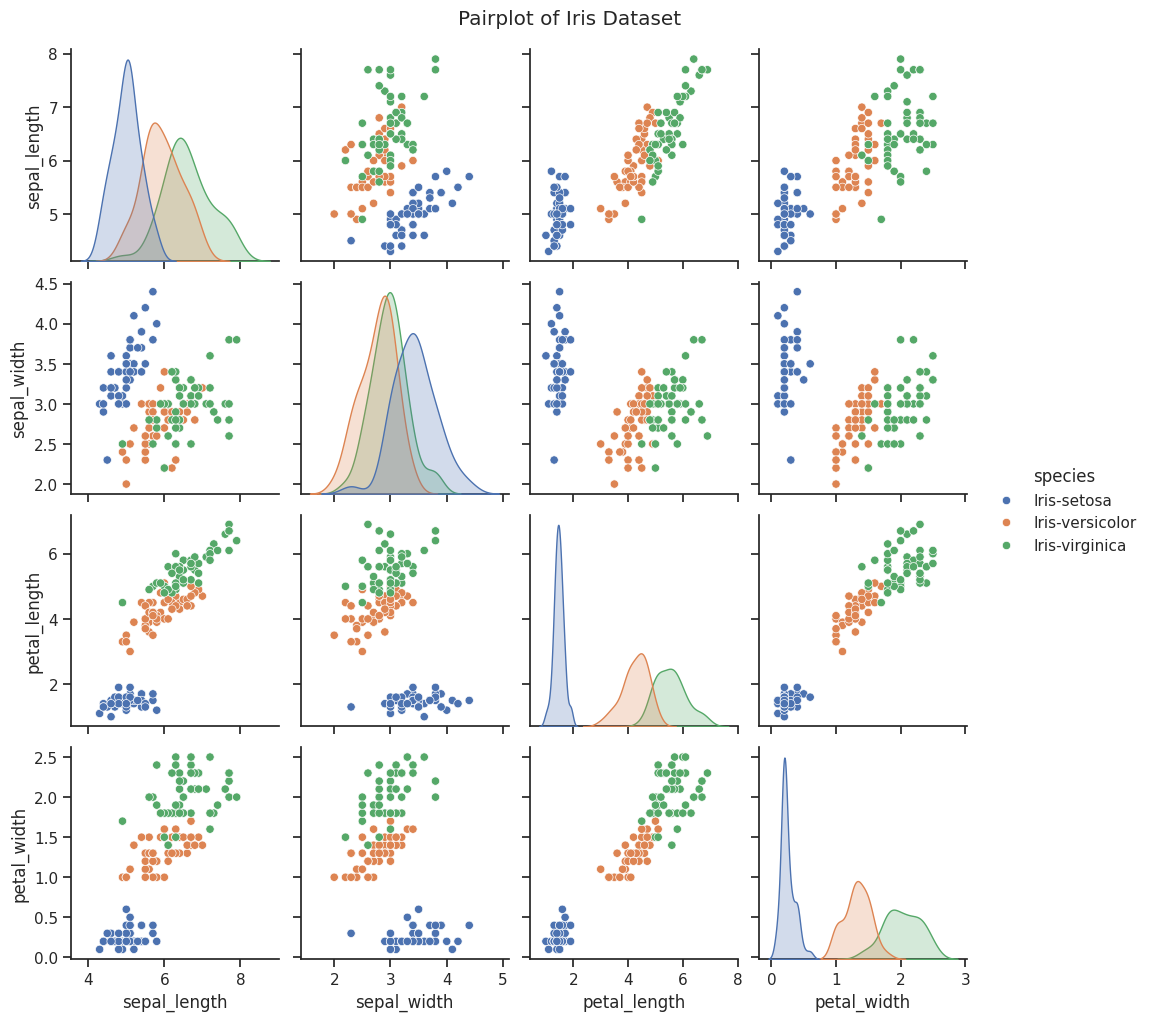

In [214]:
sns.pairplot(df_cleaned, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [215]:
# Correlation heatmap

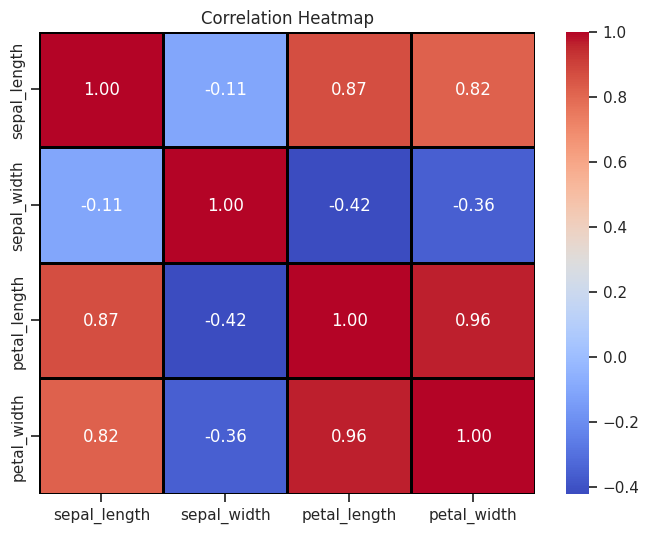

In [216]:
correlation_matrix = df_cleaned.drop('species', axis=1).corr()  # Drop 'species' column for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

---
---

---
---

In [217]:
# Split the data into features (X) and target (y)

In [218]:
X = df_cleaned.drop('species', axis=1)  # Features (sepal_length, sepal_width, petal_length, petal_width)


In [219]:
y = df_cleaned['species']  # Target variable (species)

In [220]:
# Split the dataset into training (80%) and testing (20%) sets

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [222]:
# Scale the features using StandardScaler

In [223]:
scaler = StandardScaler()

In [224]:
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data


In [225]:
X_test_scaled = scaler.transform(X_test)  # Only transform on test data

In [226]:
# Check the shapes of the datasets

In [227]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (117, 4)
X_test shape: (30, 4)
y_train shape: (117,)
y_test shape: (30,)


---
---

---
---

In [228]:
# Evaluate KNN for different k values (from 1 to 20)

In [229]:
k_values = range(1, 21)

In [230]:
train_accuracies = []

In [231]:
test_accuracies = []

In [232]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Accuracy on training set
    train_acc = knn.score(X_train_scaled, y_train)
    train_accuracies.append(train_acc)

    # Accuracy on test set
    test_acc = knn.score(X_test_scaled, y_test)
    test_accuracies.append(test_acc)

---
---

---
---

In [233]:
# Plot the accuracy for different k values

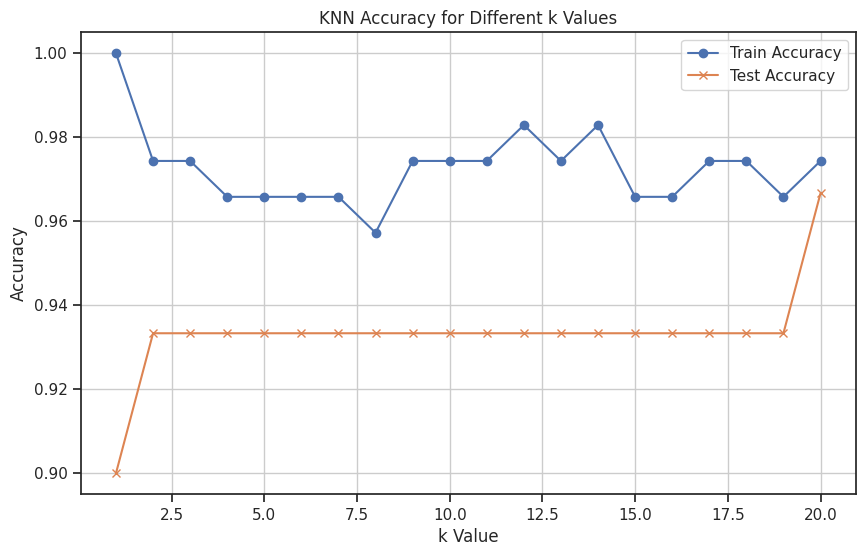

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

---
---

---
---

In [235]:
# Choose the best k (highest test accuracy)

In [236]:
best_k = k_values[test_accuracies.index(max(test_accuracies))]

In [237]:
print(f"Best k value: {best_k}")

Best k value: 20


---
---

---
---

In [238]:
# Train the final KNN model with the best k value

In [239]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)

In [240]:
final_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20)

---
---

In [241]:
# Evaluate the model's performance on the test set

In [242]:
y_pred = final_knn.predict(X_test_scaled)

In [243]:
accuracy = accuracy_score(y_test, y_pred)

In [244]:
class_report = classification_report(y_test, y_pred)

In [245]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [246]:
# Display accuracy, classification report, and confusion matrix

In [247]:
print(f"Accuracy on test set: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on test set: 0.9667
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


---
---

---
---

In [248]:
# Visualize the confusion matrix

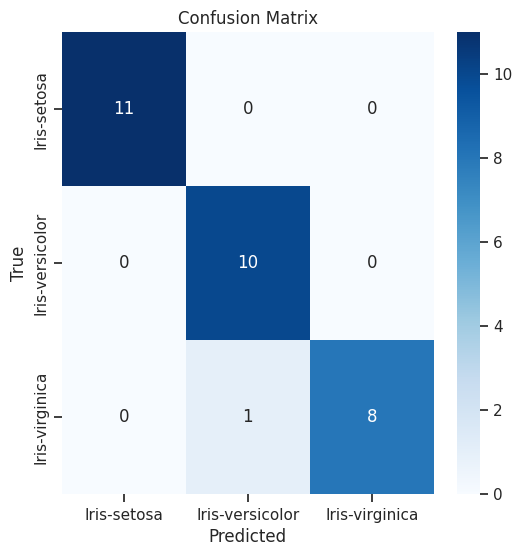

In [249]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

---
---

----
----

In [250]:
# Perform 3-fold cross-validation on the training data

In [251]:
knn_cv = KNeighborsClassifier(n_neighbors=best_k)

In [252]:
# Cross-validation scores (3 folds)

In [253]:
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=3)

In [254]:
# Display the cross-validation scores

In [255]:
print(f"Cross-validation scores: {cv_scores}")

Cross-validation scores: [0.97435897 0.87179487 0.94871795]


In [256]:
# Calculate the mean and standard deviation of the cross-validation scores

In [257]:
cv_mean = np.mean(cv_scores)

In [258]:
cv_std = np.std(cv_scores)

In [259]:
# Display mean and standard deviation

In [260]:
print(f"Mean of cross-validation scores: {cv_mean:.4f}")
print(f"Standard deviation of cross-validation scores: {cv_std:.4f}")

Mean of cross-validation scores: 0.9316
Standard deviation of cross-validation scores: 0.0436


---
---

---
---

In [261]:
# Fit the Logistic Regression model

In [262]:
logreg = LogisticRegression(max_iter=200)

In [263]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

---
---

----
----

In [264]:
# Extract the feature coefficients

In [265]:
coefficients = logreg.coef_[0]

In [266]:
# Visualize the feature importance using a bar plo

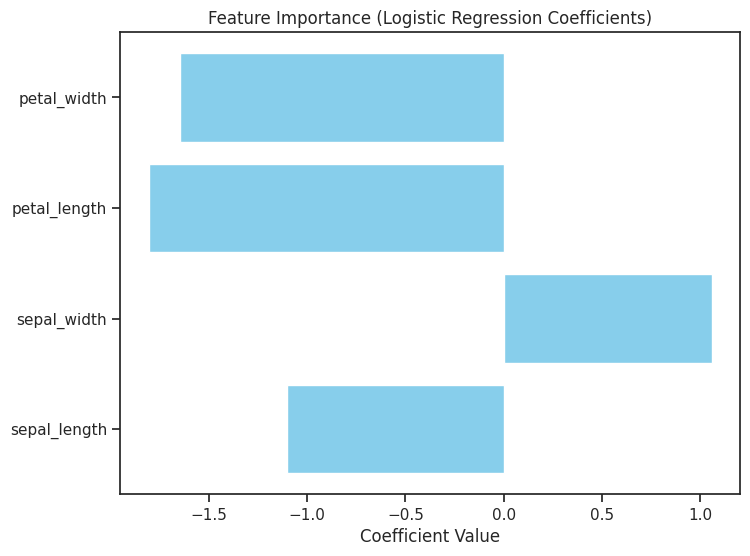

In [267]:
features = X.columns  # Feature names
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

----
----

----
----

In [268]:
# Save the trained KNN model, scaler, and the performance results

In [269]:
joblib.dump(final_knn, '/content/final_knn_model.joblib')

['/content/final_knn_model.joblib']

In [270]:
joblib.dump(scaler, '/content/scaler.joblib')

['/content/scaler.joblib']

In [295]:
# Save accuracy, classification report, and confusion matrix to CSV(Optional)

In [296]:
#results = pd.DataFrame({
#    'Accuracy': [accuracy],
#    'Classification Report': [class_report],
#    'Confusion Matrix': [conf_matrix]
#})

In [275]:
results.to_csv('/content/model_performance.csv', index=False)

---
---

---
---

In [276]:
# Load the saved KNN model and scaler

In [277]:
knn_loaded = joblib.load('/content/final_knn_model.joblib')

In [278]:
scaler_loaded = joblib.load('/content/scaler.joblib')

In [279]:
# Define a function for making predictions

In [280]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Prepare the input data
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale the input data using the loaded scaler
    input_scaled = scaler_loaded.transform(input_data)

    # Make the prediction using the loaded model
    prediction = knn_loaded.predict(input_scaled)

    return prediction[0]

In [282]:
# Test the prediction function with a sample flower

In [281]:
sample_flower = {'sepal_length': 5.1, 'sepal_width': 3.5, 'petal_length': 1.4, 'petal_width': 0.2}


In [283]:
predicted_species = predict_species(**sample_flower)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [284]:
print(f"Predicted species for the sample flower: {predicted_species}")

Predicted species for the sample flower: Iris-setosa


---
---

----
----

In [285]:
# Initialize the Dash app

In [286]:
app = dash.Dash(__name__)

In [288]:
# Define the layout of the app

In [289]:
app.layout = html.Div([
    html.H1("Iris Flower Prediction"),

    # Input fields for flower features
    html.Label("Sepal Length:"),
    dcc.Input(id='sepal-length', type='number', value=5.1),

    html.Label("Sepal Width:"),
    dcc.Input(id='sepal-width', type='number', value=3.5),

    html.Label("Petal Length:"),
    dcc.Input(id='petal-length', type='number', value=1.4),

    html.Label("Petal Width:"),
    dcc.Input(id='petal-width', type='number', value=0.2),

    # Button to trigger prediction
    html.Button('Predict', id='predict-button', n_clicks=0),

    # Display prediction output
    html.Div(id='prediction-output'),

    # Graph for Correlation Heatmap
    html.Div([
        html.H3("Correlation Heatmap"),
        dcc.Graph(id='heatmap')
    ]),

    # Graph for Pairplot
    html.Div([
        html.H3("Pairplot"),
        dcc.Graph(id='pairplot')
    ])
])

In [290]:
# Define callback for updating output and graphs

In [291]:
@app.callback(
    [Output('prediction-output', 'children'),
     Output('heatmap', 'figure'),
     Output('pairplot', 'figure')],
    [Input('sepal-length', 'value'),
     Input('sepal-width', 'value'),
     Input('petal-length', 'value'),
     Input('petal-width', 'value'),
     Input('predict-button', 'n_clicks')]
)
def update_output(sepal_length, sepal_width, petal_length, petal_width, n_clicks):
    try:
        prediction_output = "Enter flower features and click 'Predict'"
        heatmap_figure = None
        pairplot_figure = None

        if n_clicks > 0:
            # Prepare input data for prediction
            input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

            # Scale input data
            scaled_input = scaler.transform(input_data)

            # Make prediction
            prediction = knn_model.predict(scaled_input)

            # Prepare prediction output
            prediction_output = f"The predicted species is: {prediction[0]}"

        # Prepare correlation heatmap
        numeric_data = iris_data.select_dtypes(include=[np.number])  # Select numeric columns
        corr_matrix = numeric_data.corr()  # Calculate correlation matrix
        heatmap_figure = px.imshow(corr_matrix, title="Correlation Heatmap", labels={"x": "Features", "y": "Features"})

        # Prepare pairplot
        pairplot_figure = px.scatter_matrix(iris_data, color="species", title="Pairplot")

        # Save prediction results to CSV
        result_df = pd.DataFrame({
            'Sepal Length': [sepal_length],
            'Sepal Width': [sepal_width],
            'Petal Length': [petal_length],
            'Petal Width': [petal_width],
            'Predicted Species': [prediction[0]] if n_clicks > 0 else ["N/A"]
        })
        result_df.to_csv('/content/prediction_results.csv', mode='a', header=False, index=False)

        return prediction_output, heatmap_figure, pairplot_figure

    except Exception as e:
        # Handle errors
        print(f"Error: {e}")
        return f"An error occurred: {e}", {}, {}


In [292]:
# Run the app

In [293]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

---
---